In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
con = sqlite3.connect("../data/checking-logs.sqlite.sqlite copy")

## analyze only the users and not the admins

In [3]:
df = pd.io.sql.read_sql("SELECT timestamp FROM checker WHERE uid LIKE 'user_%';", parse_dates=['timestamp'], con=con)
df['day'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
df.drop(columns='timestamp', inplace=True)
df['day'] = df['day'].apply(lambda x: bool(len(pd.bdate_range(x, x))))
df['day'] = df['day'].map({False: 'weekend', True: 'working_day'})
df

,day,hour
0,working_day,5
1,working_day,5
2,working_day,5
3,working_day,5
4,working_day,5
...,...,...
3202,working_day,20
3203,working_day,20
3204,working_day,20
3205,working_day,20


## create two lists of values (for working days and for weekends) for the histogram input

In [4]:
working_day = df['hour'][df['day'] == 'working_day'].tolist()
weekend = df['hour'][df['day'] == 'weekend'].tolist()
print(len(working_day))
print(len(weekend))

2037
1170


## the figsize is still the same, you can choose the fontsize as well as the color palette

## use a level of transparency for the histogram in front equal to 0.7

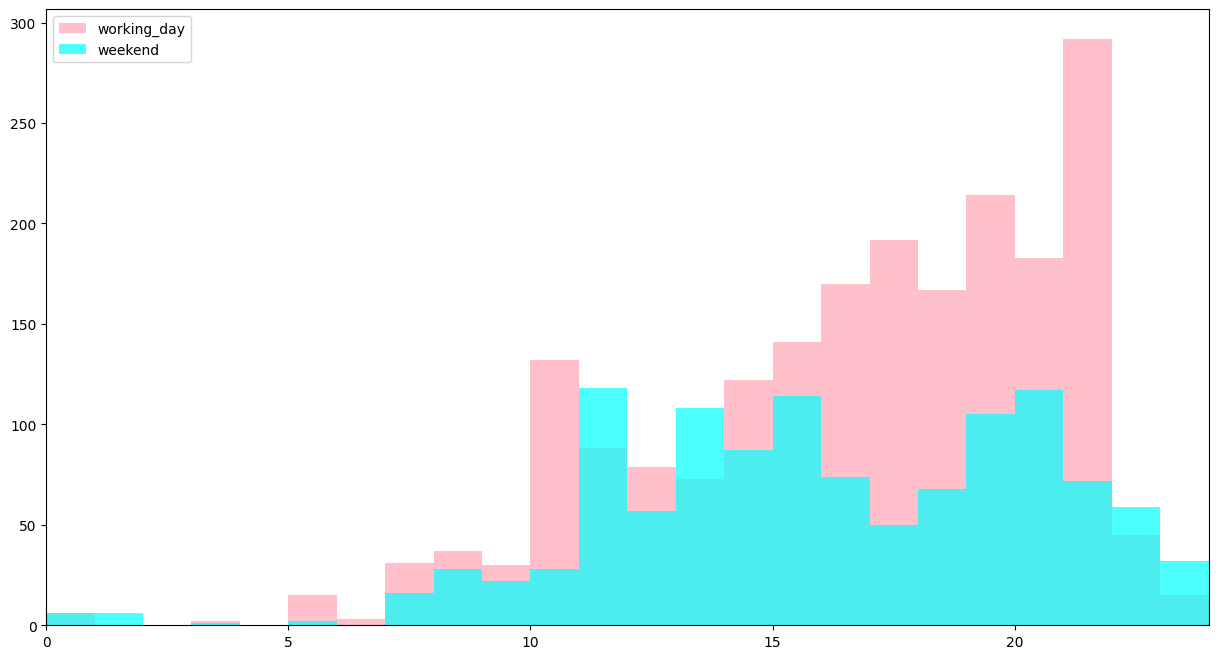

In [5]:
plt.figure(figsize=(15,8))
plt.hist(working_day, bins=24, range=[0, 24], label='working_day', color='pink')
plt.hist(weekend, bins=24, range=[0, 24], label='weekend', alpha=0.7, color='cyan')
plt.xlim(0,24)
plt.legend()
plt.show()

## Are there hours when the total number of commits was higher on weekends than on working days?

In [6]:
print("Yes: 11, 13, 22 and 23 hours are the ones with number of commits was higher on weekends than on working days")

Yes: 11, 13, 22 and 23 hours are the ones with number of commits was higher on weekends than on working days


In [7]:
con.close()